## IPBMA_5: Projection Radiography
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [216]:
import numpy as np
import matplotlib.pyplot as pyplot
import sys, os
from auxFiles.auxFnc import *
from auxFiles.phantomsFnc import *
from auxFiles.plotFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join(sys.path[0], 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join(sys.path[0], 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join('.', 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join('.', 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}

### SOURCE

In [142]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 40
I0= 250
N0, eE= source(kVp, I0)

print(N0, eE)

250 16.0


#### CUBE PHANTOM

In [143]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= cube_phantom_nh(size, eE)

1.62 0.0 1.5


### QUANTUM IMAGE. FRONTAL VIEW.

In [144]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
# prj = 'lateral'
qImage= interactor_PR(N0, obj, prj)

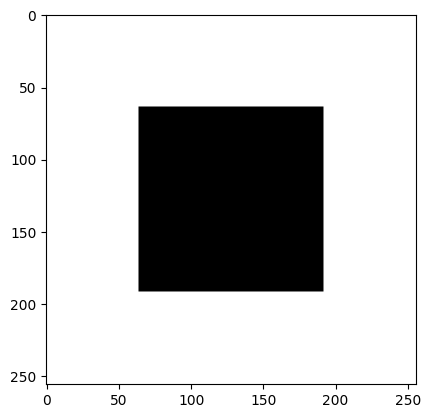

In [145]:
pyplot.imshow(qImage, cmap="gray")
pyplot.show()

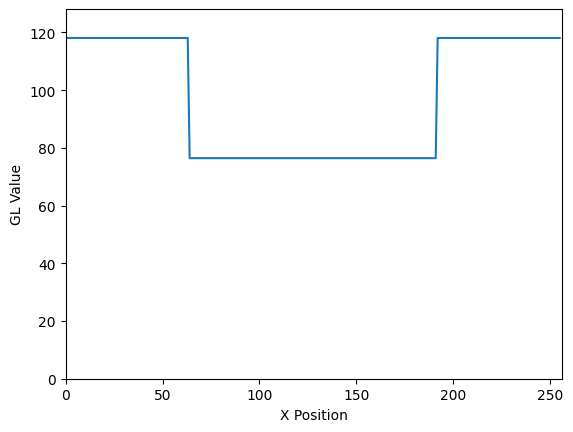

In [146]:
plotLineH(qImage, 128)

In [147]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 7056776


In [148]:
# Get Distribution of the Photons per Cell

nPC= getNumberPhotonsCell(qImage, N0)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 7056776


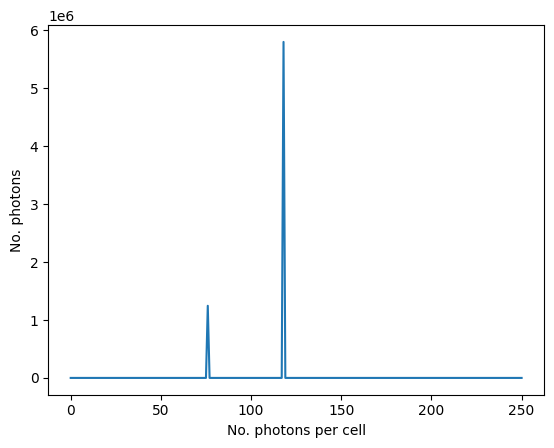

In [149]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [150]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


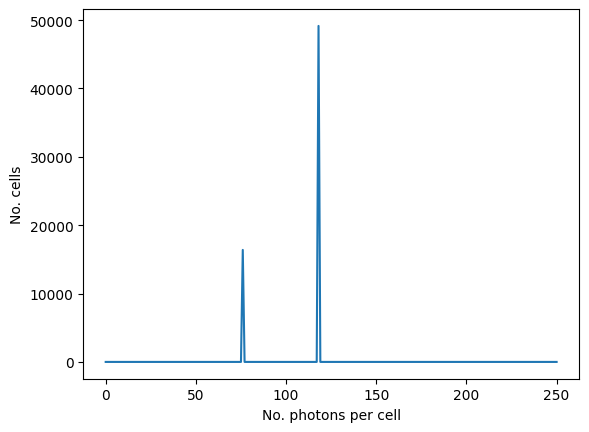

In [151]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

### QUANTUM IMAGE. LATERAL VIEW.

In [152]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

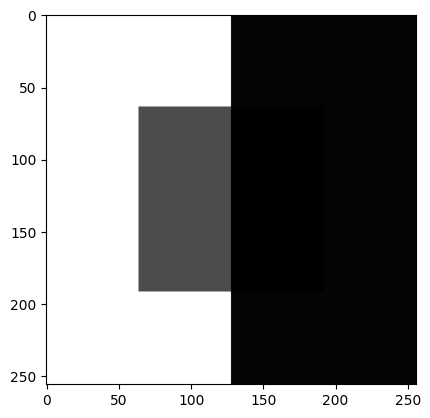

In [153]:
pyplot.imshow(qImage, cmap="gray")
pyplot.show()

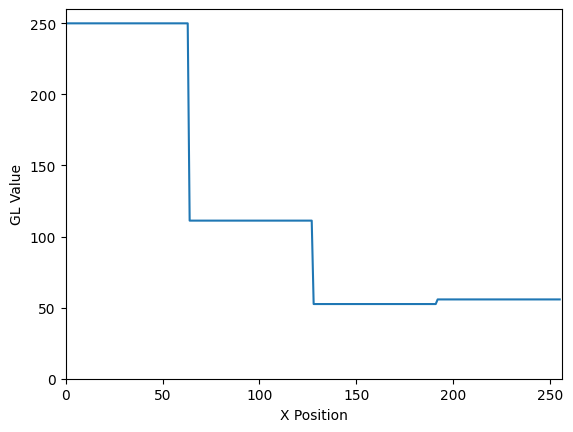

In [154]:
plotLineH(qImage, 128)

In [155]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 8856339


In [156]:
# Get Distribution of the Photons per Cell

nPC= getNumberPhotonsCell(qImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 8856339


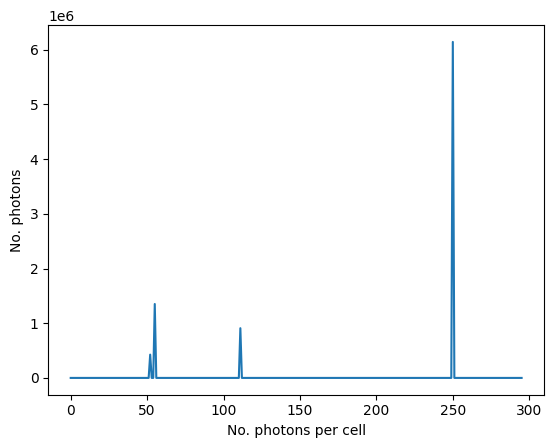

In [157]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [158]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


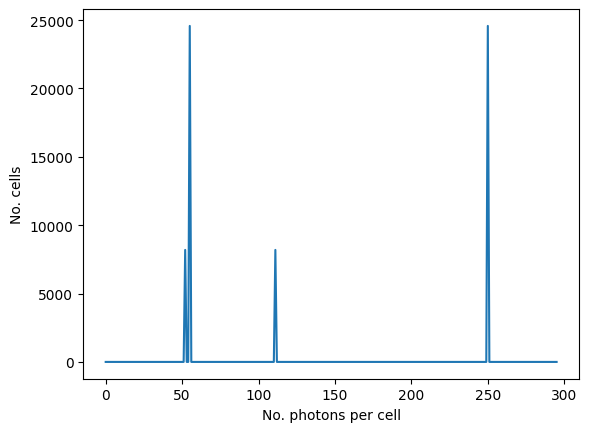

In [159]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

### DETECTED IMAGE

In [218]:
# Detection
# dImage -> The detected image, under the hypothesis of Poisson distribution.
dImage= detectorNoiseP_1_1(qImage)

N Cells: 256 256


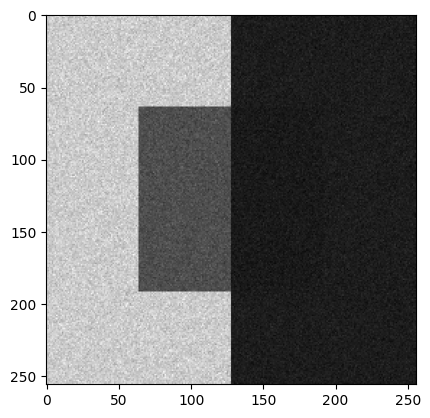

In [219]:
pyplot.imshow(dImage, cmap="gray")
pyplot.show()

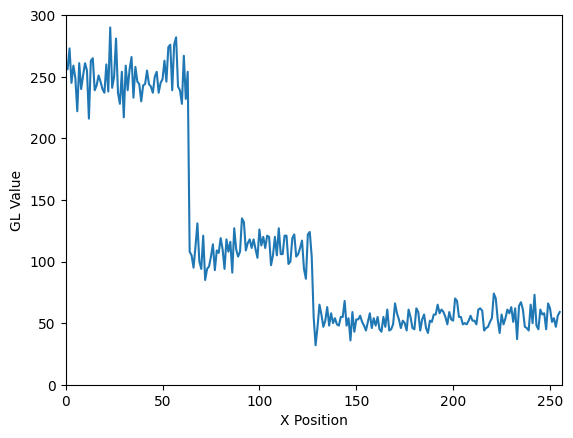

In [220]:
plotLineH(dImage, 128)

In [221]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

nDI= getNumberPhotons(dImage)
print(f'Number of Photons (Detected image): {nDI:d}')

assert nSI > nQI > nDI, "Something wrong happens"


Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 8856339
Number of Photons (Detected image): 8851896


In [222]:
# Get Distribution of the Photons per Cell

nPCD= getNumberPhotonsCell(dImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Photons (Detected image): {int(sum(nPCD[1])):d}')

Number of Photons (Detected image): 8851896


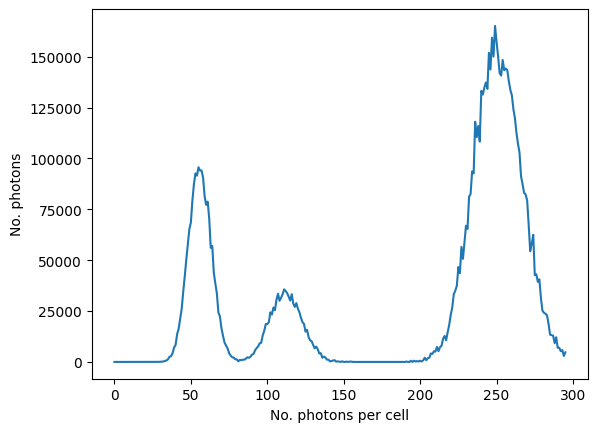

In [223]:
plotDistribution(nPCD, 'No. photons per cell', 'No. photons')

In [224]:
# Get Distribution of cells per Photons

nCPD= getNumberCellsPhoton(dImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Cells (Detected image): {int(sum(nCPD[1])):d}')

Number of Cells (Detected image): 65472


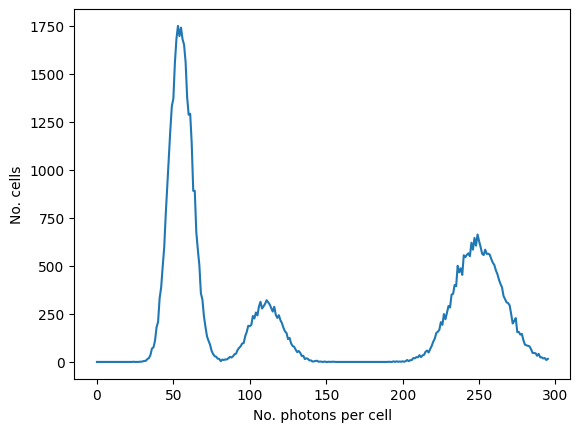

In [225]:
plotDistribution(nCPD, 'No. photons per cell', 'No. cells')

### EXPERIMENTS

### Experiment 1. Baseline.

In [226]:
# Source Data 1

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 12.0


In [227]:
# OBJECT

size= 256
obj= cube_phantom_nh(size, eE)

4.14 0.0 3.87


In [228]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [229]:
# Detection

dImage= detectorNoiseP_1_1(qImage)

N Cells: 256 256


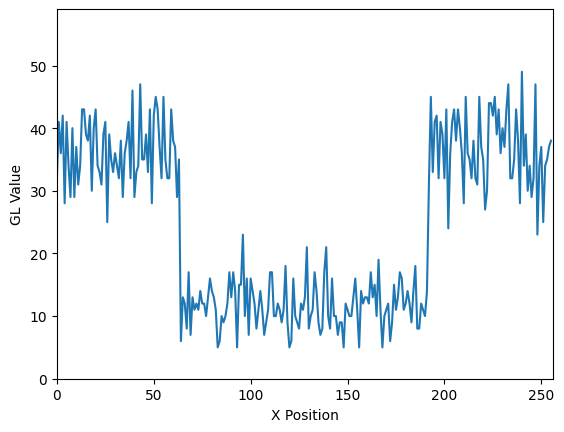

In [230]:
plotLineH(dImage, 128)

In [232]:
# Contrast 1
w= 10
cnt_1= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 1
snr_1= getSNR(dImage, 125, 128, w)

print(f'Constrast 1: {cnt_1: .3f}, SNR 1: {snr_1: .3f}')

Constrast 1:  0.394, SNR 1:  3.498


Experiment 2. Image Contrast

In [233]:
# Source Data 2

kVp= 130
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 52.0


In [234]:
# OBJECT

size= 256
obj= cube_phantom_nh(size, eE)

0.24 0.0 0.22


In [235]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [236]:
# Detection

dImage= detectorNoiseP_1_1(qImage)

N Cells: 256 256


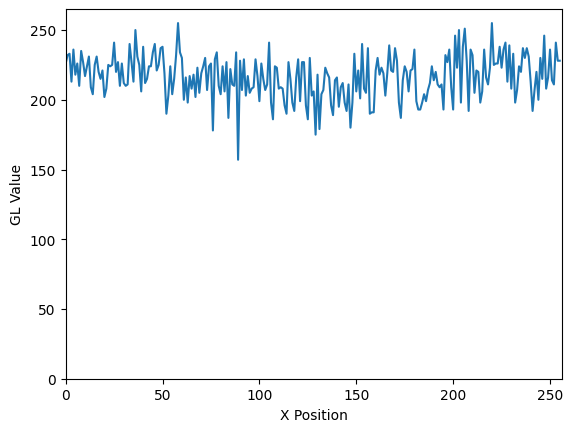

In [237]:
plotLineH(dImage, 128)

In [238]:
# Contrast 2
w= 10
cnt_2= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 2
snr_2= getSNR(dImage, 125, 128, w)

print(f'Constrast 2: {cnt_2: .3f}, SNR 2: {snr_2: .3f}')

Constrast 2:  0.046, SNR 2:  13.898


Experiment 3. Noise.

In [239]:
# Source Data 3

kVp= 30
I0= 2500  
N0, eE= source(kVp, I0)

print(N0, eE)

2500 12.0


In [240]:
# OBJECT

size= 256
obj= cube_phantom_nh(size, eE)

4.14 0.0 3.87


In [241]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

In [242]:
# Detection

dImage= detectorNoiseP_1_1(qImage)

N Cells: 256 256


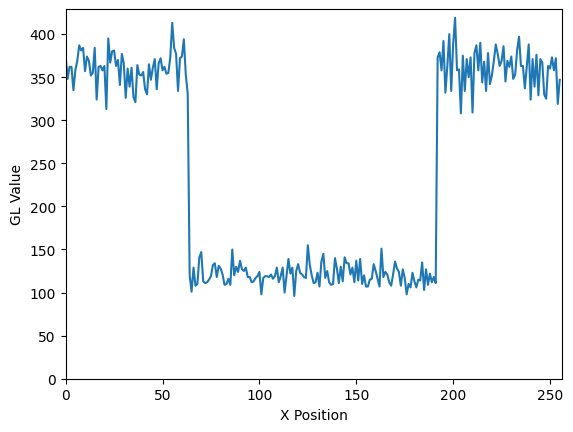

In [243]:
plotLineH(dImage, 128)

In [244]:
# Contrast 3
w= 10
cnt_3= getContrast(dImage, 25, 128, 125, 128, w)

# SNR 3
snr_3= getSNR(dImage, 125, 128, w)

print(f'Constrast 3: {cnt_3: .3f}, SNR 3: {snr_3: .3f}')

Constrast 3:  0.543, SNR 3:  12.372


In [245]:
print(f'Constrast 1: {cnt_1: .3f}, SNR 1: {snr_1: .3f}')
print(f'Constrast 2: {cnt_2: .3f}, SNR 2: {snr_2: .3f}')
print(f'Constrast 3: {cnt_3: .3f}, SNR 3: {snr_3: .3f}')

Constrast 1:  0.394, SNR 1:  3.498
Constrast 2:  0.046, SNR 2:  13.898
Constrast 3:  0.543, SNR 3:  12.372


In [246]:
assert cnt_1 > cnt_2, "Something wrong happens"
assert snr_1 < snr_2 and snr_1 < snr_3, "Something wrong happens"